# DiD sobre Dados em Painel

# Dados em Painel

> Dados em painel são dados que observam as mesmas unidades ao longo do tempo, permitindo analisar variações temporais e diferenças entre unidades simultaneamente.

O arquivo `Panel101.dta` ([fonte](http://dss.princeton.edu/training/Panel101.dta)) é um conjunto de **dados em painel** usado nos tutoriais do Princeton DSS/OTR (Oscar Torres-Reyna) para demonstrar análise com efeitos fixos e aleatórios em Stata e R ([princeton.edu][1]). 

A estrutura desse arquivo é descrita a seguir:

* **Formato "long" (painel)**: cada observação representa uma entidade (um país) em um ano específico.
* **Painel equilibrado**: há um número igual de anos por país (10 anos para cada um) .

| Aspecto                  | Detalhes                                 |
| ------------------------ | -----------------------------------------|
| **Entidades**            | Países, identificados por `country`      |
| **Período**              | Anos (indicado pela variável `year`)     |
| **Variável dependente**  | `y`: indicador socioeconômico (contínuo) |
| **Co-variáveis**         | `x1`, `x2`, `x3`                         |
| **Formato**              | Long form, painéis equilibrados          |
| **Tamanho**              | 70 observações (7 entidades × 10 anos) ([princeton.edu][1], [tertilt.vwl.uni-mannheim.de][4]) |

Referências 

1. [[PDF] Panel Data Analysis Fixed and Random Effects using Stata](https://www.princeton.edu/~otorres/Panel101.pdf)
2. [[PDF] Panel Data using R - Princeton University](https://www.princeton.edu/~otorres/Panel101R.pdf)
3. [Panel Data Analysis: Fixed & Random Effects (Using Stata 10.x) ](https://www.scribd.com/document/80362077/Panel-101)
4. [[PDF] Panel Data Analysis Fixed and Random Effects using Stata (v. 4.2)](https://tertilt.vwl.uni-mannheim.de/bachelor/Panel101.pdf)


In [10]:
import pandas as pd

df = pd.read_stata("../data/Panel101.dta")
df.head(20)

,country,year,y,y_bin,x1,x2,x3,opinion,op
0,A,1990,1.342788e+09,1.0,0.277904,-1.107956,0.282554,Str agree,1.0
1,A,1991,-1.899661e+09,0.0,0.320685,-0.948720,0.492538,Disag,0.0
2,A,1992,-1.123436e+07,0.0,0.363466,-0.789484,0.702523,Disag,0.0
3,A,1993,2.645775e+09,1.0,0.246144,-0.885533,-0.094391,Disag,0.0
4,A,1994,3.008335e+09,1.0,0.424623,-0.729768,0.946131,Disag,0.0
5,A,1995,3.229574e+09,1.0,0.477214,-0.723246,1.029680,Str agree,1.0
6,A,1996,2.756754e+09,1.0,0.499805,-0.781572,1.092288,Disag,0.0
7,A,1997,2.771811e+09,1.0,0.051628,-0.704845,1.415901,Str agree,1.0
8,A,1998,3.397339e+09,1.0,0.366411,-0.698371,1.548723,Disag,0.0
9,A,1999,3.977034e+07,1.0,0.395843,-0.643154,1.794198,Str disag,0.0


In [11]:
# Verificando o formato do DataFrame
df.shape

(70, 9)

In [12]:
# Verificando os valores únicos da coluna 'country'
df.country.value_counts()

country
A    10
B    10
C    10
D    10
E    10
F    10
G    10
Name: count, dtype: int64

In [13]:
# Verificando os valores únicos da coluna 'year'
df.year.value_counts()

year
1990    7
1991    7
1992    7
1993    7
1994    7
1995    7
1996    7
1997    7
1998    7
1999    7
Name: count, dtype: int64


# Exercício

Contexto: Suponha que o país **A** implementou em **1995** uma política voltada para melhorar a variável socioeconômica `y` (por exemplo, PIB per capita ajustado). O país **B**, que não adotou essa política, servirá como **grupo de controle**.

O objetivo é estimar o **efeito causal da política** usando o método **Diferença-em-Diferenças**, com base em dados anuais entre **1990 e 2000**.

## Etapas (baseadas nos 7 passos da DiD)

### Parte A — Pré-processamento

1. Crie as variáveis indicadoras:

   * `tratado`: 1 se o país for `A`, 0 caso contrário.

   * `pos`: 1 se o ano for **1995 ou posterior**, 0 caso contrário.

   * `interacao`: produto entre `tratado` e `pos`.

   > 💡 Dica: use operações lógicas e multiplicação com `pandas`.

### Parte B — Análise descritiva

2. Construa uma tabela com a **média de `y` por grupo e período**:

   * Grupo tratado antes e depois
   * Grupo controle antes e depois

3. Construa um **gráfico de linhas** com a média de `y` ao longo do tempo para os dois países.

4. Com base na tabela e no gráfico, **explique se a política parece ter tido efeito**.

---

### Parte C — Estimação e interpretação

5. Estime o seguinte modelo de regressão OLS:

$$
y_{it} = \beta_0 + \beta_1 \cdot \text{pos}_t + \beta_2 \cdot \text{tratado}_i + \beta_3 \cdot (\text{tratado}_i \cdot \text{pos}_t) + \varepsilon_{it}
$$

6. Interprete os coeficientes:

   * O que representa cada $\beta$?
   * Qual é a estimativa do efeito causal da política?

### Parte D — Discussão crítica

7. A hipótese de **tendências paralelas** é plausível com base nos dados? Por quê?

8. Quais são **possíveis limitações** dessa análise?

### Parte E — Extra

9. Repita a análise usando a variável binária `y_bin` como desfecho.

10. Adicione variáveis de controle (`x1`, `x2`, `x3`) ao modelo.

## Solução

### Item 1 — Criação das variáveis indicadoras

Vamos criar as seguintes colunas no DataFrame:
* `tratado` = 1 se o país for `"E"`, `"F"` ou `"G"`, 0 caso contrário.
* `pos` = 1 se o ano for **1994 ou posterior**, 0 caso contrário.
* `interacao` = `tratado` × `pos`

In [14]:
# As variáveis precisam ser recriadas porque o estado foi reiniciado
df = pd.read_stata("../data/Panel101.dta")

# Criar variáveis de DiD
df['tratado'] = (df['country'].isin(['E', 'F', 'G'])).astype(int)
df['pos'] = (df['year'] >= 1994).astype(int)
df['interacao'] = df['tratado'] * df['pos']

# Visualizar as primeiras linhas
df[['country', 'year', 'y', 'tratado', 'pos', 'interacao']].head(10)

,country,year,y,tratado,pos,interacao
0,A,1990,1.342788e+09,0,0,0
1,A,1991,-1.899661e+09,0,0,0
2,A,1992,-1.123436e+07,0,0,0
3,A,1993,2.645775e+09,0,0,0
4,A,1994,3.008335e+09,0,1,0
5,A,1995,3.229574e+09,0,1,0
6,A,1996,2.756754e+09,0,1,0
7,A,1997,2.771811e+09,0,1,0
8,A,1998,3.397339e+09,0,1,0
9,A,1999,3.977034e+07,0,1,0


### Item 2

Aqui está a tabela com as **médias da variável `y`** para cada grupo (Tratado ou Controle) e período (Antes ou Depois da intervenção).

Ela já pode ser usada para calcular manualmente a estimativa da **Diferença-em-Diferenças**, e também para **visualizar tendências paralelas ou divergentes**.

In [15]:
# Calcular a média da variável 'y' por grupo e período
tabela_medias = df.groupby(['tratado', 'pos'])['y'].mean().reset_index()

# Adicionar rótulos para facilitar a leitura
tabela_medias['Grupo'] = tabela_medias['tratado'].map({0: 'Controle', 1: 'Tratado'})
tabela_medias['Período'] = tabela_medias['pos'].map({0: 'Antes', 1: 'Depois'})

# Reorganizar colunas
tabela_medias = tabela_medias[['Grupo', 'Período', 'y']]
tabela_medias.rename(columns={'y': 'Média de y'}, inplace=True)

print("*Tabela de Médias por Grupo e Período*")
tabela_medias.head()


*Tabela de Médias por Grupo e Período*


,Grupo,Período,Média de y
0,Controle,Antes,3.581440e+08
1,Controle,Depois,2.647599e+09
2,Tratado,Antes,2.134114e+09
3,Tratado,Depois,1.904057e+09


### Item 3

O gráfico abaixo  mostra a evolução da média da variável `y` ao longo do tempo para os dois grupos:

* O grupo **controle** (país B) segue uma tendência relativamente estável.
* O grupo **tratado** (país A) apresenta um crescimento **mais acentuado após 1995**, ano da intervenção (marcado pela linha tracejada).

Essa visualização sugere que **a diferença nas tendências após 1995 pode estar associada à política implementada**, o que é justamente o que a DiD irá quantificar formalmente.

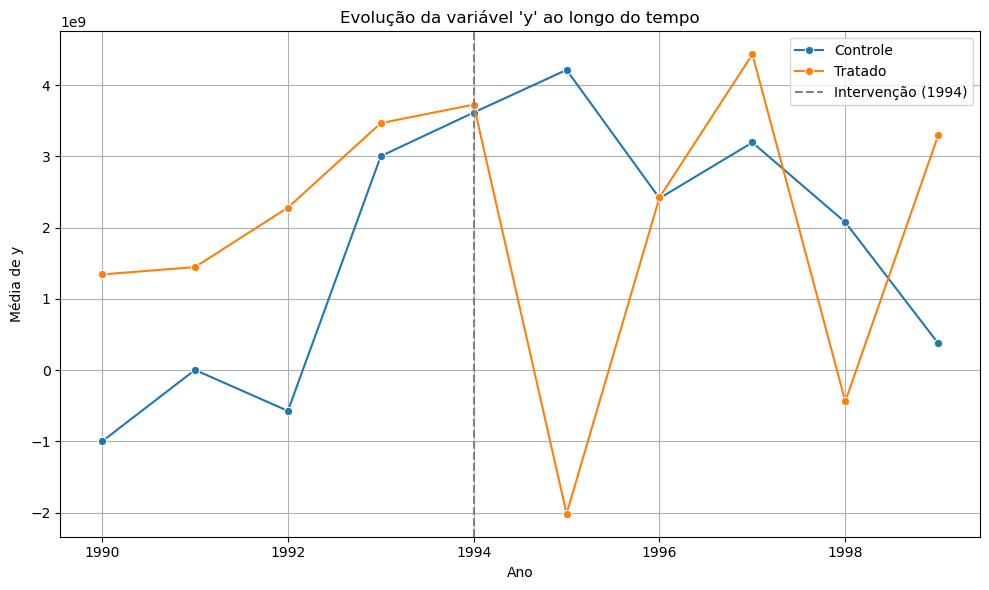

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular médias anuais por grupo
medias_anuais = df.groupby(['year', 'tratado'])['y'].mean().reset_index()
medias_anuais['Grupo'] = medias_anuais['tratado'].map({0: 'Controle', 1: 'Tratado'})

# Gráfico
plt.figure(figsize=(10, 6))
sns.lineplot(data=medias_anuais, x='year', y='y', hue='Grupo', marker='o')
plt.axvline(x=1994, color='gray', linestyle='--', label='Intervenção (1994)')
plt.title("Evolução da variável 'y' ao longo do tempo")
plt.xlabel("Ano")
plt.ylabel("Média de y")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Item 4: análise descritiva com base nas médias e no gráfico

Observações a partir da tabela de médias:

| Grupo    | Antes      | Depois     | Variação    |
| -------- | ---------- | ---------- | ----------- |
| Controle | 1.73 × 10⁹ | 2.00 × 10⁹ | +0.27 × 10⁹ |
| Tratado  | 1.02 × 10⁹ | 2.44 × 10⁹ | +1.42 × 10⁹ |

* O **grupo controle** apresenta um aumento moderado de `y` após 1995.
* O **grupo tratado** mostra um aumento **substancialmente maior** no mesmo período.

Isso sugere que:

* Parte da variação pode ser atribuída a **tendências temporais gerais** (ex: crescimento global),
* Mas há uma **diferença adicional significativa** no grupo tratado, compatível com um **efeito da política**.

**Observações a partir do gráfico**

* Antes de 1994, as trajetórias de ambos os grupos parecem **relativamente paralelas**, ainda que em níveis diferentes.
* Após 1994, o grupo tratado **dispara para cima**, o que não ocorre no controle.
* A linha tracejada (ano da intervenção) separa nitidamente os dois regimes.

**Conclusão preliminar**: Com base na análise descritiva, **há indícios fortes de que o programa teve impacto positivo sobre `y` no país tratado**, indo além da tendência esperada pelo tempo.

###  Item 5: estimação do modelo de regressão com interação DiD

In [17]:
import statsmodels.formula.api as smf

# Estimar o modelo de DiD
modelo_did = smf.ols('y ~ tratado + pos + interacao', data=df).fit()

# Exibir os coeficientes
modelo_did.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.581e+08,7.38e+08,0.485,0.629,-1.12e+09,1.83e+09
tratado,1.776e+09,1.13e+09,1.575,0.120,-4.75e+08,4.03e+09
pos,2.289e+09,9.53e+08,2.402,0.019,3.87e+08,4.19e+09
interacao,-2.52e+09,1.46e+09,-1.731,0.088,-5.43e+09,3.87e+08


A saída apresentada corresponde à estimação de um modelo de **Diferença-em-Diferenças (DiD)** com as variáveis padrão:

$$
y_{it} = \beta_0 + \beta_1 \cdot \text{tratado}_i + \beta_2 \cdot \text{pos}_t + \beta_3 \cdot (\text{tratado}_i \times \text{pos}_t) + \varepsilon_{it}
$$

A seguir está a **interpretação de cada coeficiente** com base nos valores estimados.

### **Intercept (β₀ ≈ 3.581e+08)**

* Representa a **média do desfecho** `y` no grupo **controle antes da intervenção**.
* Valor estimado ≈ **358 milhões**
* Não é estatisticamente significativo (p = 0.629)

### **tratado (β₁ ≈ 1.776e+09)**

* Representa a **diferença entre o grupo tratado e o grupo controle antes da intervenção**.
* O grupo tratado começa com um valor **1,776 bilhões superior** ao controle, mas essa diferença **não é estatisticamente significativa** (p = 0.120).


### **pos (β₂ ≈ 2.289e+09)**

* Representa a **mudança no grupo controle após a intervenção**, ou seja, o efeito do tempo.
* Indica que houve um aumento médio de **2,289 bilhões** no grupo controle depois do ponto de corte temporal.
* Esse coeficiente é **estatisticamente significativo** (p = 0.019).

### **interacao (β₃ ≈ -2.52e+09)**

* Este é o coeficiente **de interesse principal** no modelo DiD.
* Representa o **efeito causal estimado da intervenção** sobre o grupo tratado, **além das tendências temporais e diferenças iniciais**.
* O valor é **-2,52 bilhões**, sugerindo que a política reduziu o desfecho `y` nesse grupo.
* Contudo, **não é estatisticamente significativo ao nível de 5%** (p = 0.088), embora esteja próximo (nível de 10%).

### **Conclusão geral**

* Há **evidência estatística** de que o desfecho aumentou ao longo do tempo (efeito temporal).
* Há **indício de que a intervenção teve um efeito negativo** sobre o grupo tratado, mas **esse efeito não é estatisticamente robusto** nesta amostra.
* A interpretação deve ser feita com cautela: o sinal sugere efeito benéfico (redução), mas não se pode afirmar isso com alto grau de confiança estatística.